In [136]:
import pandas as pd
import matplotlib
from sklearn import preprocessing
%matplotlib inline

In [137]:
df = pd.read_csv('data/raw2.csv', low_memory=False)

In [138]:
#filter rows
nedf = df[(df.posteam==input) & (df.down.isin([1.0, 2.0, 3.0, 4.0])) & ((df.play_type=='run') | (df.play_type == 'pass'))]

In [139]:
#filter columns
nedf = nedf[['game_seconds_remaining', 'yardline_100', 'down', 'ydstogo', 'play_type', 'pass_length', 'pass_location', 'run_location']]

In [140]:
nedf

,game_seconds_remaining,yardline_100,down,ydstogo,play_type,pass_length,pass_location,run_location
351,3594.0,54.0,1.0,10,pass,short,left,NaN
352,3555.0,40.0,1.0,10,pass,deep,left,NaN
353,3525.0,14.0,1.0,10,run,NaN,NaN,right
354,3480.0,9.0,2.0,5,run,NaN,NaN,right
355,3437.0,9.0,3.0,5,pass,short,right,NaN
...,...,...,...,...,...,...,...,...
449353,167.0,23.0,3.0,10,pass,short,right,NaN
449355,150.0,14.0,4.0,1,run,NaN,NaN,left
449357,120.0,11.0,1.0,10,run,NaN,NaN,right
449359,115.0,8.0,2.0,7,run,NaN,NaN,middle


In [141]:
import numpy as np
def get_full_play_type(play):
    play_type, pass_location, run_location = play
    if(play_type == 'run'):
        return play_type+'_'+ run_location
    else:
        return play_type+'_'+ pass_location
nedf = nedf.replace(np.nan, 'unknown', regex=True)    
nedf['full_play_type'] = nedf[['play_type','pass_location', 'run_location']].apply(get_full_play_type, axis=1)
nedf = nedf[(nedf.full_play_type.isin(['pass_left', 'pass_middle','pass_right','run_left', 'run_middle', 'run_right']))]

In [142]:
nedf.groupby(['full_play_type']).count()[['play_type']]

,play_type
full_play_type,
pass_left,2358
pass_middle,1334
pass_right,2452
run_left,1629
run_middle,572
run_right,1791


<AxesSubplot:ylabel='full_play_type'>

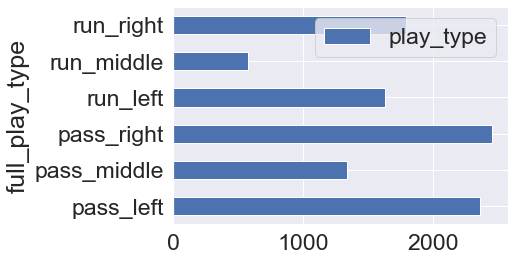

In [143]:
nedf.groupby(['full_play_type']).count()[['play_type']].plot(kind='barh')

In [144]:
nedf.groupby(['full_play_type']).count()[['play_type']].apply(lambda x:100 * x / float(x.sum()))

,play_type
full_play_type,
pass_left,23.263615
pass_middle,13.161010
pass_right,24.191002
run_left,16.071429
run_middle,5.643252
run_right,17.669692


In [145]:
le = preprocessing.LabelEncoder()
le.fit(nedf.full_play_type)
nedf['full_play_type_code'] = le.transform(nedf['full_play_type'])

<AxesSubplot:ylabel='full_play_type_code'>

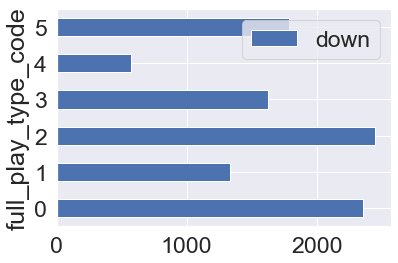

In [146]:
nedf.groupby(['full_play_type_code']).count()[['down']].plot(kind='barh')

In [147]:
def bucketize(val, size, count):
    i=0
    for i in range(count):
        if val <= (i+1)*size:
            return i
    return i
def bucketize_df(df):
    df['ydstogo'] = [bucketize(x, 4, 5) for x in df['ydstogo']]
    return df
nedf = bucketize_df(nedf)

In [148]:
nedf = pd.concat([nedf, pd.get_dummies(nedf['down'], prefix='down')], axis=1)
nedf = pd.concat([nedf, pd.get_dummies(nedf['ydstogo'], prefix='ydstogo')], axis=1)

In [149]:
nedf.describe()

,yardline_100,down,ydstogo,full_play_type_code,down_1.0,down_2.0,down_3.0,down_4.0,ydstogo_0,ydstogo_1,ydstogo_2,ydstogo_3,ydstogo_4
count,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000
mean,50.146902,1.757893,1.529400,2.206788,0.459550,0.336622,0.190213,0.013615,0.184392,0.193469,0.559294,0.034037,0.028808
std,25.234271,0.803536,0.926784,1.731013,0.498386,0.472578,0.392489,0.115891,0.387823,0.395037,0.496496,0.181333,0.167275
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,72.000000,2.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,99.000000,4.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
nedf['yardline_100']/=100

In [151]:
nedf.describe()

,yardline_100,down,ydstogo,full_play_type_code,down_1.0,down_2.0,down_3.0,down_4.0,ydstogo_0,ydstogo_1,ydstogo_2,ydstogo_3,ydstogo_4
count,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000,10136.000000
mean,0.501469,1.757893,1.529400,2.206788,0.459550,0.336622,0.190213,0.013615,0.184392,0.193469,0.559294,0.034037,0.028808
std,0.252343,0.803536,0.926784,1.731013,0.498386,0.472578,0.392489,0.115891,0.387823,0.395037,0.496496,0.181333,0.167275
min,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.720000,2.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.990000,4.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
from sklearn.model_selection import train_test_split

In [153]:
#select important columns for input
X=nedf[['yardline_100', 'down', 'ydstogo', 'down_1.0', 'down_2.0', 'down_3.0', 'down_4.0','ydstogo_0','ydstogo_1','ydstogo_2','ydstogo_3','ydstogo_4']]
#select result column for output
Y=nedf['full_play_type_code']
#split data for train and test
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 0)

In [154]:
from sklearn.ensemble import RandomForestClassifier
the_clf=RandomForestClassifier(max_depth=8, n_estimators=64)
the_clf.fit(train_x, train_y)

RandomForestClassifier(max_depth=8, n_estimators=64)

In [155]:
from sklearn.metrics import accuracy_score, explained_variance_score
pred = the_clf.predict(test_x)
acc =accuracy_score(test_y, pred)
print(acc)

0.2565114443567482


In [156]:
eacc = explained_variance_score(test_y, pred)
print(eacc)

-1.0297337628779277


In [157]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_y, pred)
import matplotlib.pyplot as plt

In [158]:
from sklearn.metrics import classification_report
pred = the_clf.predict(test_x)
target_names = ['Pass Left', 'Pass Middle', 'Pass Right','Run Left','Run Middle', 'Run Right']
print(classification_report(test_y, pred, target_names=target_names))

              precision    recall  f1-score   support

   Pass Left       0.28      0.40      0.33       601
 Pass Middle       0.22      0.06      0.09       309
  Pass Right       0.27      0.26      0.27       627
    Run Left       0.26      0.13      0.17       412
  Run Middle       0.20      0.01      0.03       139
   Run Right       0.23      0.38      0.28       446

    accuracy                           0.26      2534
   macro avg       0.24      0.21      0.19      2534
weighted avg       0.25      0.26      0.23      2534



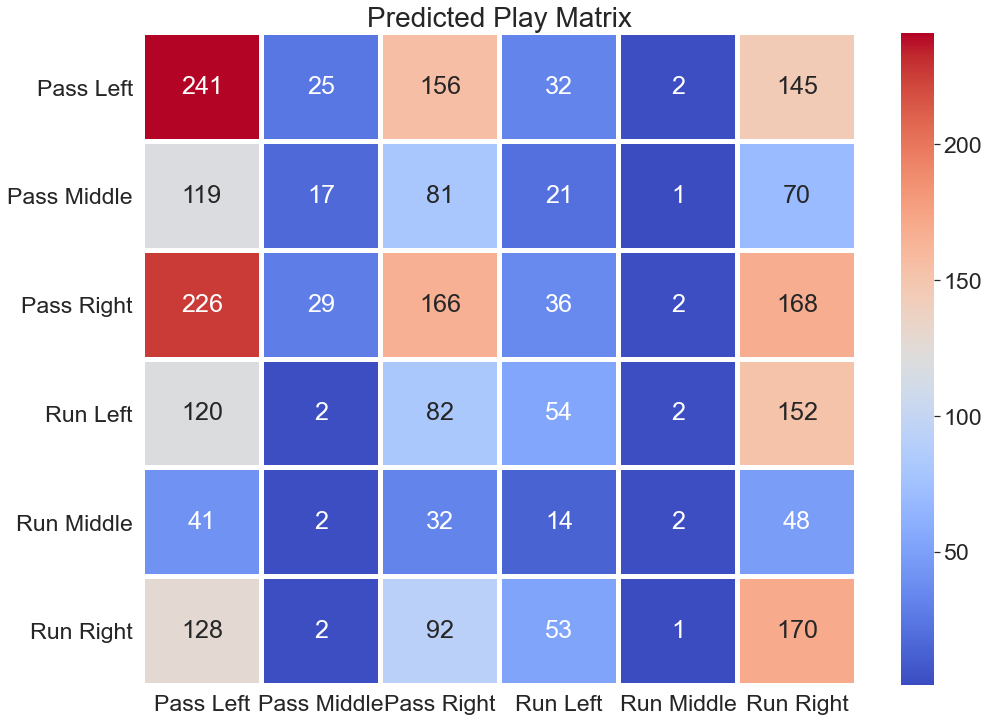

In [159]:
import seaborn as sns
plt.subplots(figsize=(16,12))
plt.title('Predicted Play Matrix', fontsize = 28) 
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
x_axis_labels = ['Pass Left', 'Pass Middle', 'Pass Right','Run Left','Run Middle', 'Run Right']
y_axis_labels = ['Pass Left', 'Pass Middle', 'Pass Right','Run Left','Run Middle', 'Run Right']
sns.set(font_scale=2.1)
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap='coolwarm', annot=True, linewidths=4, fmt='g')